### SAADHANA SRINATH
Prediction using Unsupervised ML model : K-Means Clustering

STEPS:

1. Import
2. EDA
2. Feature Extraction
   - Feature Eng. 
     + no nulls
     + type should be df/array
     + numerics only
     + in the form of rows/columns
4. Find Optimum No. of Clusters
5. Cluster the data

### 1. Importing the Datset

In [1]:
## Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

## Loading the iris dataset
df = pd.read_csv('Iris.csv')
print('Imported successfully')

Imported successfully


In [2]:
## Checking the dataset
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. Exploratory Data Analysis

##### Understanding the data

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Bivariate Analysis

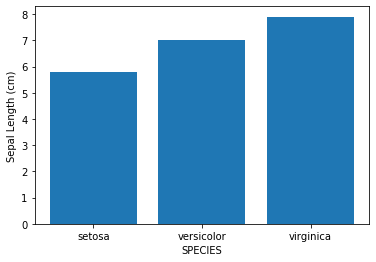

In [7]:
## Understanding the correlation between Species and Sepal Length

plt.bar(df['species'],df['sepal_length'])
plt.xlabel('SPECIES')
plt.ylabel('Sepal Length (cm)')

plt.show()

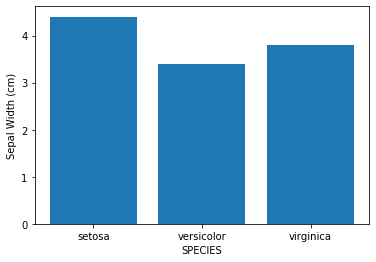

In [8]:
## Understanding the correlation between Species and Sepal Width

plt.bar(df['species'],df['sepal_width'])
plt.xlabel('SPECIES')
plt.ylabel('Sepal Width (cm)')

plt.show()

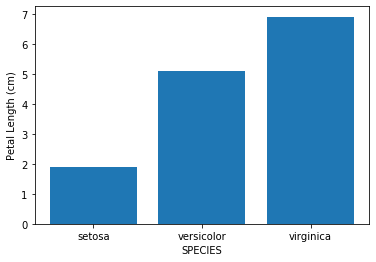

In [9]:
## Understanding the correlation between Species and Petal Length

plt.bar(df['species'],df['petal_length'])
plt.xlabel('SPECIES')
plt.ylabel('Petal Length (cm)')

plt.show()

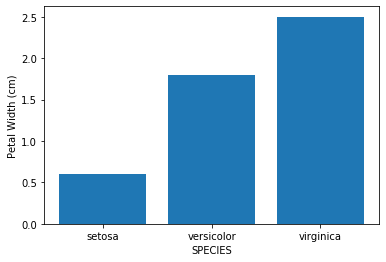

In [10]:
## Understanding the correlation between Species and Petal Width

plt.bar(df['species'],df['petal_width'])
plt.xlabel('SPECIES')
plt.ylabel('Petal Width (cm)')

plt.show()

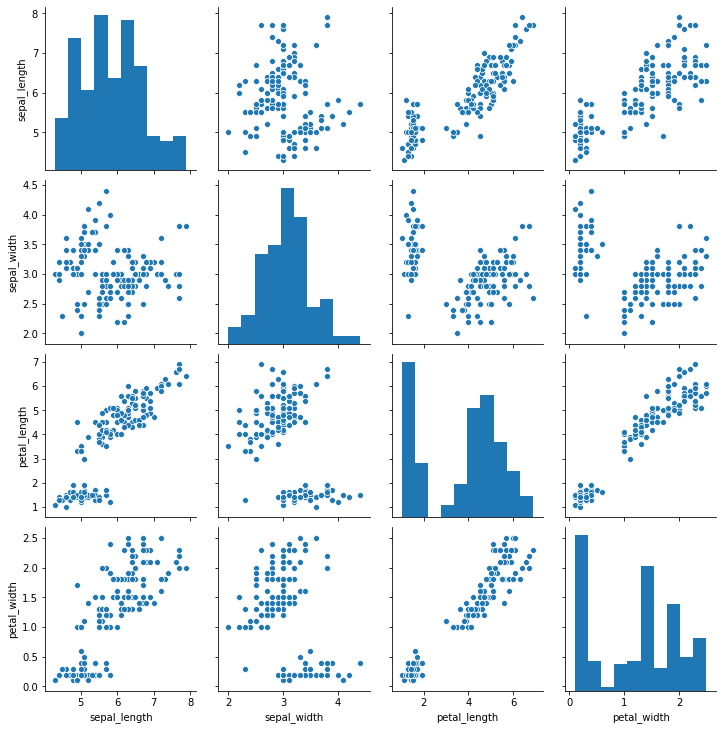

In [11]:
## Understand the correlations between all 4 parameters
sns.pairplot(df)

### 3. Feature Extraction

In [12]:
## Removing unwanted columns
df.drop(columns=['species'], inplace=True, axis=1)

In [13]:
## Feature Engineering isn't required here as all columns are numerical, there are no nulls present and they are in the 
## required format
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 4. Finding the Optimum No. of Clusters

using Elbow method to find minimum no. of clusters

#####  Elbow method
The no. of clusters varies within a certain range. For each number, within-cluster sum of square(wcss) value is calculated and stored in a list which is then plotted against the range of number of clusters used.
When the wcss doesn't decrease significantly with each iteration, that is taken as the optimum no. of clusters. This is indicated when the 'elbow' occurs in the graph.

In [14]:
## Calculating the within-cluster sum of square

wcss = []
cluster_rng = range(1,15)
for k in cluster_rng:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    wcss.append(km.inertia_)

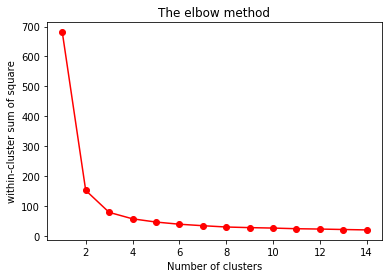

In [15]:
## Plotting against clusters range

plt.plot(cluster_rng, wcss, 'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of square')

plt.show()

##### Since the elbow occurs at 3, Optimum No. of Clusters = 3

### 5. Clustering the Data

In [16]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred = model.fit_predict(df)

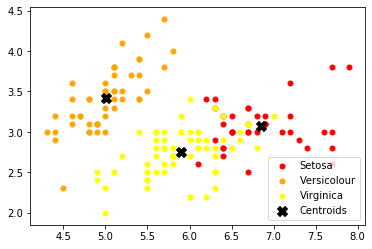

In [17]:
## Plotting the Clusters

x = df.iloc[:,[0,1,2,3]].values
plt.scatter(x[pred == 0,0], x[pred == 0,1], s = 25, c='red', label='Setosa')
plt.scatter(x[pred == 1,0], x[pred == 1,1], s = 25, c='orange', label='Versicolour')
plt.scatter(x[pred == 2,0], x[pred == 2,1], s = 25, c='yellow', label='Virginica')


## Plotting the Centroids

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c='black', marker='X', label='Centroids')
plt.legend()
plt.show()